# Problem 3
* Explore and cluster the neighborhoods in Toronto.
* Generate maps to visualize your neighborhoods and how they cluster together

In [114]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

from bs4 import BeautifulSoup # this module helps in web scrapping.


print('Libraries imported.')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.



Scrape the List of postal codes of Canada

In [115]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [116]:
soup = BeautifulSoup(source, 'xml')

In [117]:
#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [118]:
# Search all the postcode, borough, neighborhood 
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [119]:
df.head(5)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


Adding Longitude and Latitude

In [120]:
#Getting the files from csv file in my github since geocoder was unreliable
url2 = "https://raw.githubusercontent.com/aymiee/Toronto/master/Geospatial_Coordinates.csv"
#s=requests.get(url2).content
dfCoordinates = pd.read_csv(url2)
#print(dfCoordinates.loc[dfCoordinates['Postal Code'] == 'M3A'].Latitude)

df['Latitude'] = None
df['Longitude'] = None

for index, row in df.iterrows():  
    Latitude = dfCoordinates.loc[dfCoordinates['Postal Code'] == row['PostalCode']].Latitude
    Longitude = dfCoordinates.loc[dfCoordinates['Postal Code'] == row['PostalCode']].Longitude
    row['Latitude'] = float(Latitude)
    row['Longitude'] = float(Longitude)
    
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7533,-79.3297
1,M4A,North York,Victoria Village,43.7259,-79.3156
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
4,M7A,Queen's Park,Ontario Provincial Government,43.6623,-79.3895
5,M9A,Etobicoke,Islington Avenue,43.6679,-79.5322
6,M1B,Scarborough,"Malvern, Rouge",43.8067,-79.1944
7,M3B,North York,Don Mills North,43.7459,-79.3522
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7064,-79.3099
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789


In [121]:
df.shape

(103, 5)

 ## Segmenting and Clustering Neighborhoods in Toronto


Focusing on Downtown Toronto Neighborhood

In [122]:
neighborhoods = df.loc[df['Borough'] == "Downtown Toronto"]
neighborhoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789
15,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754
20,M5E,Downtown Toronto,Berczy Park,43.6448,-79.3733
24,M5G,Downtown Toronto,Central Bay Street,43.658,-79.3874
25,M6G,Downtown Toronto,Christie,43.6695,-79.4226
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.6506,-79.3846
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.6408,-79.3818
42,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.6472,-79.3816
48,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.6482,-79.3798


In [123]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 1 boroughs and 17 neighborhoods.


Use geopy library to get the latitude and longitude values of Toronto

In [124]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


 Create a map of Toronto with neighborhoods superimposed on top (Downtown Toronto)

In [159]:
import folium # map rendering library
# create map of  Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    #print(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

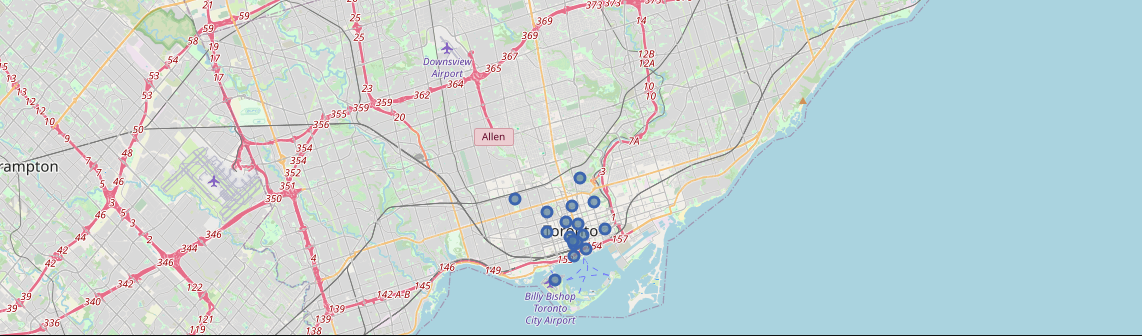

Define Foursquare Credentials and Version

In [126]:
CLIENT_ID = '0DGKX4HSNQCVVH5MMWFIRRCQC5HVK10N2GWPJQII0RFRD2CI' # your Foursquare ID
CLIENT_SECRET = 'O35VK0FMONFGPK20FLR1YDE1MJCA0BUP5NJZPO4BEKNLY5RD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:'+'1DDKVRAR52FSE5CQT4LRX1G4RNZNIH1VAXJE5V4TBS3TMKOG')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:1DDKVRAR52FSE5CQT4LRX1G4RNZNIH1VAXJE5V4TBS3TMKOG
CLIENT_ID: 0DGKX4HSNQCVVH5MMWFIRRCQC5HVK10N2GWPJQII0RFRD2CI
CLIENT_SECRET:O35VK0FMONFGPK20FLR1YDE1MJCA0BUP5NJZPO4BEKNLY5RD


Let's explore the random neighborhood in our dataframe

In [127]:
neighborhoods.loc[2, 'Neighborhood']

'Regent Park, Harbourfront'

Get the neighborhood's latitude and longitude values.

In [128]:
neighborhood_latitude =neighborhoods.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


## 1.Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [129]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius



url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0DGKX4HSNQCVVH5MMWFIRRCQC5HVK10N2GWPJQII0RFRD2CI&client_secret=O35VK0FMONFGPK20FLR1YDE1MJCA0BUP5NJZPO4BEKNLY5RD&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [130]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6104a38f8b2ed93a31da6268'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [131]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
     
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [132]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON
#nearby_venues.head()

In [133]:
venues = results['response']['groups'][0]['items']

    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues.apply(get_category_type, axis=1)

for index, row in nearby_venues.iterrows(): 
    nearby_venues['venue.categories'] = get_category_type(row)
    
    # clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Antique Shop,43.653447,-79.362017
1,Tandem Coffee,Antique Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Antique Shop,43.653249,-79.358008
3,Impact Kitchen,Antique Shop,43.656369,-79.356980
4,Body Blitz Spa East,Antique Shop,43.654735,-79.359874


In [134]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


## 2.Explore Neighborhoods in Toronto

In [135]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [136]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


Let's check the size of the resulting dataframe

In [137]:
print(toronto_venues.shape)
toronto_venues.head()


(1110, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Let's check how many venues were returned for each neighborhood

In [138]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,57,57,57,57,57,57
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,67,67,67,67,67,67
Christie,15,15,15,15,15,15
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [139]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 202 uniques categories.


## 3. Analyze Each Neighborhood

In [140]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# define a list of column names
cols = toronto_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
toronto_onehot = toronto_onehot.reindex(columns= cols)

#check result
toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [141]:
toronto_onehot.shape

(1110, 202)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [142]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.052632,0.000000,0.000000,0.00,0.017544,0.017544,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.017544,0.052632,0.052632,0.000000,0.000000,0.00,0.00,0.017544,0.000000,0.017544,0.000000,0.000000,0.017544,0.00,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.00,0.000000,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.017544,0.017544,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.017544,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.017544,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.017544,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Let's confirm the new size

In [143]:
toronto_grouped.shape

(17, 202)

Let's print each neighborhood along with the top 5 most common venues

In [144]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0          Bakery  0.05
1    Cocktail Bar  0.05
2     Coffee Shop  0.05
3        Pharmacy  0.04
4  Farmers Market  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.20
1    Airport Lounge  0.13
2  Airport Terminal  0.13
3           Airport  0.07
4     Boat or Ferry  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.06
2  Italian Restaurant  0.04
3      Sandwich Place  0.04
4                 Spa  0.03


----Christie----
           venue  freq
0  Grocery Store  0.27
1           Café  0.20
2           Park  0.13
3     Baby Store  0.07
4    Coffee Shop  0.07


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.07
2     Sushi Restaurant  0.07
3              Gay Bar  0.04
4           Restaurant  0.04


--

Let's put that into a pandas dataframe

In [145]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [146]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Bakery,Cocktail Bar,Coffee Shop,Farmers Market,Cheese Shop,Pub,Restaurant,Seafood Restaurant,Beer Bar,Pharmacy
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Boat or Ferry,Plane,Rental Car Location
2,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Spa,Japanese Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Restaurant
3,Christie,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Nightclub,Coffee Shop,Restaurant,Doner Restaurant
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Yoga Studio,Fast Food Restaurant,Men's Store,Pub,Hotel


## 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [147]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [148]:
# add clustering labels
#kmeans.labels_
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.dropna(subset = ['Cluster Labels'], inplace=True)

toronto_merged.tail() # check the last columns

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.6289,-79.3944,4,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Boat or Ferry,Plane,Rental Car Location
91,M4W,Downtown Toronto,Rosedale,43.6796,-79.3775,0,Park,Playground,Trail,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.668,-79.3677,1,Coffee Shop,Pizza Place,Restaurant,Pub,Café,Italian Restaurant,Bakery,Park,Gastropub,Butcher
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.6484,-79.3823,1,Coffee Shop,Café,Hotel,Restaurant,Gym,Japanese Restaurant,American Restaurant,Seafood Restaurant,Bakery,Asian Restaurant
99,M4Y,Downtown Toronto,Church and Wellesley,43.6659,-79.3832,1,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Yoga Studio,Fast Food Restaurant,Men's Store,Pub,Hotel


Finally, let's visualize the resulting clusters

In [165]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print( cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
       fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

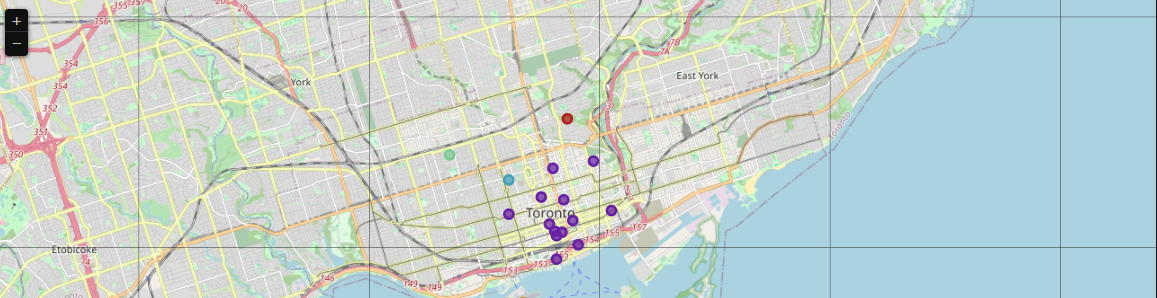

## 5. Examine Clusters

In [150]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Downtown Toronto,0,Park,Playground,Trail,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [151]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,1,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Shoe Store,Restaurant
9,Downtown Toronto,1,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Hotel,Electronics Store,Lingerie Store,Italian Restaurant
15,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Clothing Store,Bakery,Cocktail Bar,Cosmetics Shop,Department Store,Creperie,Lingerie Store
20,Downtown Toronto,1,Bakery,Cocktail Bar,Coffee Shop,Farmers Market,Cheese Shop,Pub,Restaurant,Seafood Restaurant,Beer Bar,Pharmacy
24,Downtown Toronto,1,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Spa,Japanese Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Restaurant
30,Downtown Toronto,1,Coffee Shop,Clothing Store,Café,Restaurant,Hotel,Thai Restaurant,Gym,Bar,Deli / Bodega,Cosmetics Shop
36,Downtown Toronto,1,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Fried Chicken Joint,Brewery,Scenic Lookout,Baseball Stadium,Bakery
42,Downtown Toronto,1,Coffee Shop,Hotel,Café,Restaurant,Bakery,Japanese Restaurant,Salad Place,Italian Restaurant,Seafood Restaurant,Sporting Goods Shop
48,Downtown Toronto,1,Coffee Shop,Restaurant,Hotel,Café,Gym,Seafood Restaurant,Bakery,Deli / Bodega,Japanese Restaurant,American Restaurant
84,Downtown Toronto,1,Café,Bar,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Dessert Shop,Dumpling Restaurant,Bakery,Arts & Crafts Store,Grocery Store


In [152]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
80,Downtown Toronto,2,Café,Bookstore,Sandwich Place,Bar,Japanese Restaurant,Bakery,Yoga Studio,Italian Restaurant,Beer Bar,Beer Store


In [153]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Downtown Toronto,3,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Nightclub,Coffee Shop,Restaurant,Doner Restaurant


In [154]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Downtown Toronto,4,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Boat or Ferry,Plane,Rental Car Location
